In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; warnings.simplefilter('ignore')

import sys
import os
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy

# 量化相关性分析

本节建议对照阅读abu量化文档：第14节 量化相关性分析应用

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

## B1 皮尔逊相关系数

In [2]:
arr1 = np.random.rand(10000)
arr2 = np.random.rand(10000)

corr = np.cov(arr1, arr2) / np.std(arr1) * np.std(arr2)
corr

array([[ 0.0833,  0.0011],
       [ 0.0011,  0.0845]])

In [3]:
corr[0, 1]

0.0011395018762845803

In [4]:
np.corrcoef(arr1, arr2)[0, 1]

0.013586949133303166

## B2 斯皮尔曼秩相关系数

In [5]:
arr1 = np.random.rand(10000)
arr2 = arr1 + np.random.normal(0, .2, 10000)
np.corrcoef(arr1, arr2)[0, 1]

0.82119215885758945

In [6]:
import scipy.stats as stats
demo_list = [1, 2, 10, 100, 2, 1000]
print('原始序列: ', demo_list)
print('序列的秩: ', list(stats.rankdata(demo_list)))

原始序列:  [1, 2, 10, 100, 2, 1000]
序列的秩:  [1.0, 2.5, 4.0, 5.0, 2.5, 6.0]


In [7]:
# 实现斯皮尔曼秩相关系数
def spearmanr(a, b=None, axis=0):
    a, outaxis = _chk_asarray(a, axis)
    ar = np.apply_along_axis(stats.rankdata, outaxis, a)
    br = None
    if b is not None:
        b, axisout = _chk_asarray(b, axis)
        br = np.apply_along_axis(stats.rankdata, axisout, b)
    return np.corrcoef(ar, br, rowvar=outaxis)

def _chk_asarray(a, axis):
    if axis is None:
        a = np.ravel(a)
        outaxis = 0
    else:
        a = np.asarray(a)
        outaxis = axis
    if a.ndim == 0:
        a = np.atleast_1d(a)
    return a, outaxis

In [8]:
%time spearmanr(arr1, arr2)[0, 1]

CPU times: user 3.63 ms, sys: 1.46 ms, total: 5.09 ms
Wall time: 3.57 ms


0.83097621043776204

### scipy.stats中直接封装斯皮尔曼秩相关系数函数stats.spearmanr()函数

In [9]:
# 注意下面的方法速度没有上述自己实现计算spearmanr相关系数的方法快，因为附加计算了pvalue
%time stats.spearmanr(arr1, arr2)

CPU times: user 4.79 ms, sys: 1.06 ms, total: 5.84 ms
Wall time: 3.41 ms


SpearmanrResult(correlation=0.83097621043776204, pvalue=0.0)

相关分析默认强制使用local数据，所以本地无缓存，请先进行数据更新

所有获取的数据已经存放在百度云盘上，后面的章节使用的数据都是本节更新的数据，建议直接从云盘下载入库完毕的数据库，不需要从各个数据源再一个一个的下载数据进行入库，百度云地址如下：

[csv格式美股，A股，港股，币类，期货6年日k数据](https://pan.baidu.com/s/1geNZgqf) 密码: gvtr

下面数据存贮格式为hdf5数据，由于hdf5文件解压后非常大，还需要区分python版本，所以如果没有足够的存贮空间
特别是python2下，建议使用csv格式的缓存文件：

[mac系统python3 美股，A股，港股，币类，期货6年日k数据](https://pan.baidu.com/s/1o8sldNk) 密码: ecyp

[mac系统python2 A股6年日k数据: ](https://pan.baidu.com/s/1bptn25h) 密码: sid8

[mac系统python2 美股6年日k数据: ](https://pan.baidu.com/s/1geHR9Lp) 密码: uaww

[windows python3 美股，A股，港股，币类，期货6年日k数据](https://pan.baidu.com/s/1bzeVHO) 密码: 3cwe

[windows python2 A股6年日k数据: ](https://pan.baidu.com/s/1skZOe7N) 密码: 78mb

[windows python2 美股6年日k数据: ](https://pan.baidu.com/s/1i5MNzKx) 密码: 63r3

下载完毕上述数据后，hdf5解压得到df_kl.h5文件，csv解压得到csv文件夹，解压后放到下面路径下即可

In [ ]:
if abupy.env.g_is_mac_os:
    !open $abupy.env.g_project_data_dir
else:
    !echo $abupy.env.g_project_data_dir

如果不想通过直接下载数据文件的方式，也可下面通过切换至腾讯数据源，然后进行美股数据全市场更新：

备注：耗时操作，大概需要运行15分钟左右，可以在做其它事情的时候运行

In [10]:
def tx_us():
    from abupy import EMarketSourceType, EDataCacheType, EMarketTargetType
    abupy.env.g_market_source = EMarketSourceType.E_MARKET_SOURCE_tx
    abupy.env.g_data_cache_type = EDataCacheType.E_DATA_CACHE_CSV
    abu.run_kl_update(start='2011-08-08', end='2017-08-08', market=EMarketTargetType.E_MARKET_TARGET_US, n_jobs=10)

import ipywidgets
# 避免使用notebook运行run all时运行不想执行的代码
_ = ipywidgets.interact_manual(tx_us)

## B3 相关性使用示例

### 【示例1】使用abu量化系统中的ABuSimilar.find_similar_with_xxx()函数找到与目标股票相关程度最高的股票可视化，如下代码返回与特斯拉电动车相关性的分析结果

find_similar_with_cnt可视化与tsla相关top10，以及tsla相关性dict：cmp_cnt=252(252天)，加权相关rolling=True，E_CORE_TYPE_PEARS(皮尔逊)

[('usTSLA', 1.0), ('usHDP', 0.34945894774022729), ('usGEH', 0.32249333741865682), ('usVONG', 0.31735781318370526), ('usCTRP', 0.31635382527528705), ('usAMZN', 0.31166497095525281), ('usFB', 0.3105295691053877), ('usTDIV', 0.29749624195063867), ('usON', 0.29359958312897716), ('usOCLR', 0.28163978435385945)]


rolling_corr cost 21.767s


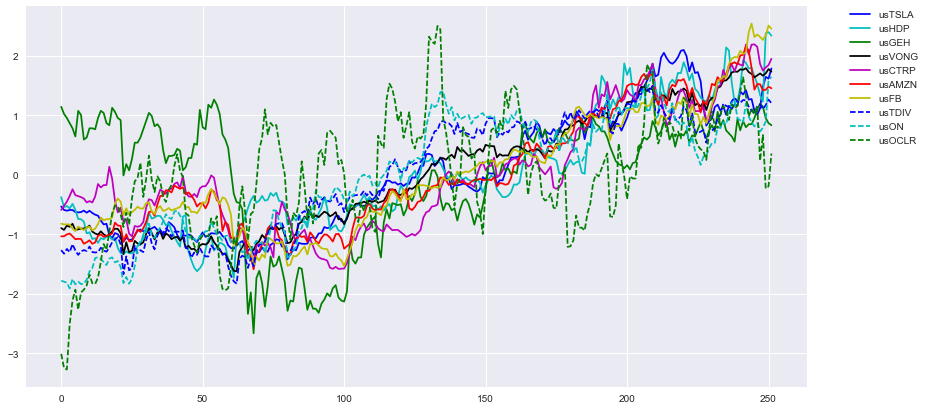

CPU times: user 24.5 s, sys: 2.21 s, total: 26.7 s
Wall time: 1min 23s


In [11]:
%%time
from abupy import find_similar_with_cnt, ECoreCorrType
net_cg_ret = find_similar_with_cnt('usTSLA', cmp_cnt=252, show_cnt=10, rolling=True, \
                      show=True, corr_type=ECoreCorrType.E_CORE_TYPE_PEARS)

find_similar_with_se可视化与tsla相关top10，以及tsla相关性dict：从'2012-01-01'直到'2017-01-01'5年数据，非加权相关，皮尔逊

[('usTSLA', 1.0), ('usQCLN', 0.53096993425213002), ('usPNQI', 0.42917278303848999), ('usQQXT', 0.40675704800763446), ('usONEQ', 0.40570933429024308), ('usQQEW', 0.4056063610982486), ('usVTWG', 0.39837516209933876), ('usTQQQ', 0.3972226044239347), ('usSKYY', 0.3958236829734012), ('usQQQ', 0.38995191914724198)]


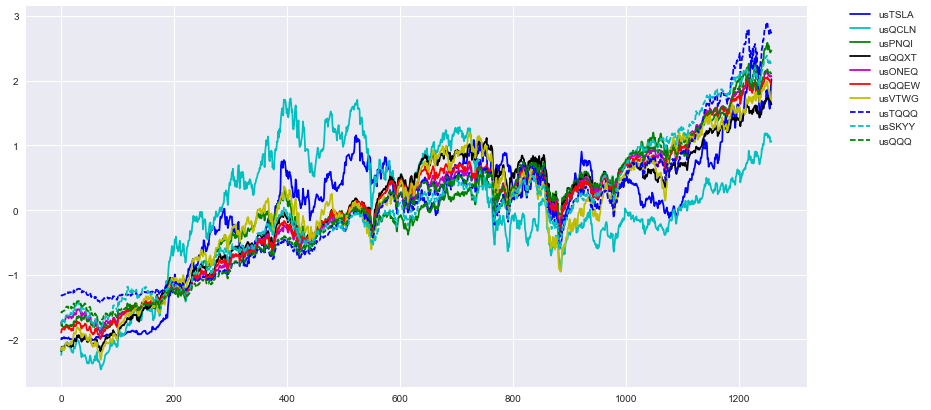

CPU times: user 4.68 s, sys: 2.87 s, total: 7.55 s
Wall time: 2min 4s


In [12]:
%%time
from abupy import find_similar_with_se, ECoreCorrType
net_cg_ret = find_similar_with_se('usTSLA', start='2012-01-01', end='2017-01-01', show_cnt=10, rolling=False, \
                      show=True, corr_type=ECoreCorrType.E_CORE_TYPE_PEARS)

find_similar_with_folds可视化与tsla相关top10，以及tsla相关性dict：n_folds=3(3年数据)，非加权相关，E_CORE_TYPE_SPERM斯皮尔曼

[('usTSLA', 1.0), ('usQCLN', 0.50148506455543906), ('usPNQI', 0.48418288603727772), ('usONEQ', 0.47315036241139025), ('usSOCL', 0.46719928151079498), ('usTQQQ', 0.46149389930338658), ('usQQQ', 0.46051831087291534), ('usQQXT', 0.45660121003458237), ('usQQEW', 0.45130419406249717), ('usSKYY', 0.44583338072273154)]


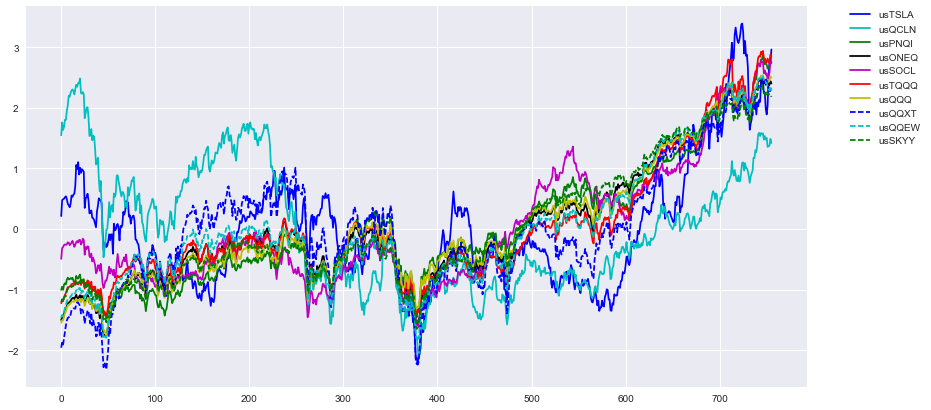

CPU times: user 5.39 s, sys: 2.79 s, total: 8.18 s
Wall time: 1min 46s


In [13]:
%%time
from abupy import find_similar_with_folds, ECoreCorrType
net_cg_ret = find_similar_with_folds('usTSLA', n_folds=3, show_cnt=10, rolling=False, \
                      show=True, corr_type=ECoreCorrType.E_CORE_TYPE_SPERM)

### 【示例2】使用abu量化系统中的ABuTLSimilar.calc_similar()函数计算两支股票相对整个市场的相关性评级rank。

pid:22926 _make_kl_df complete:100.0%
pid:22926 done!


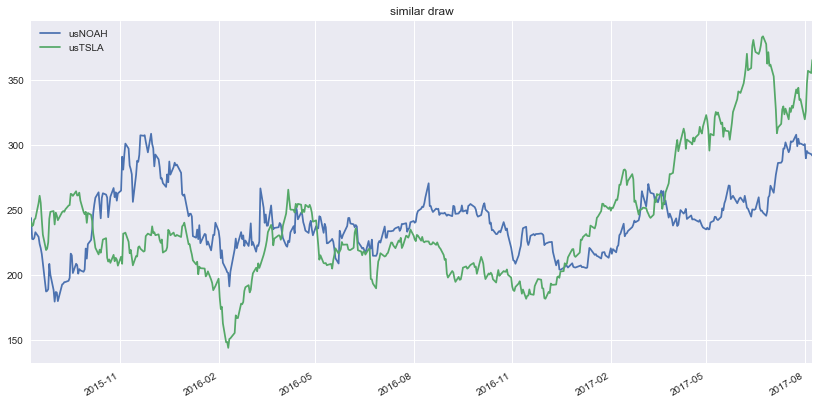

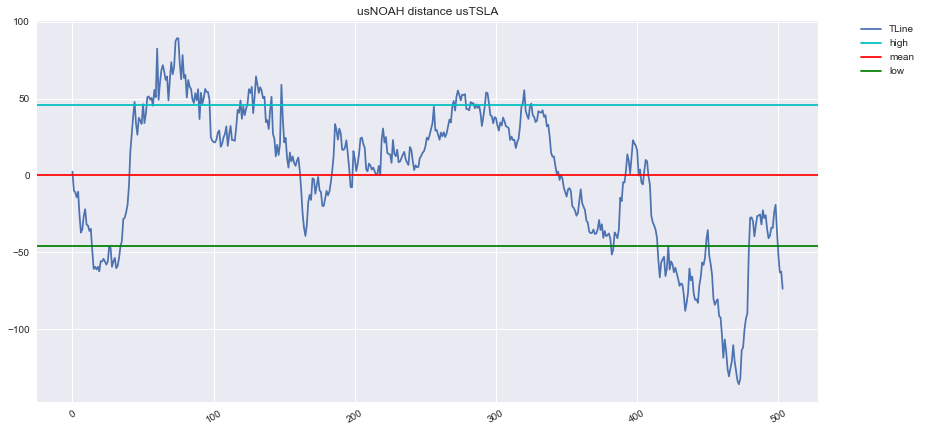

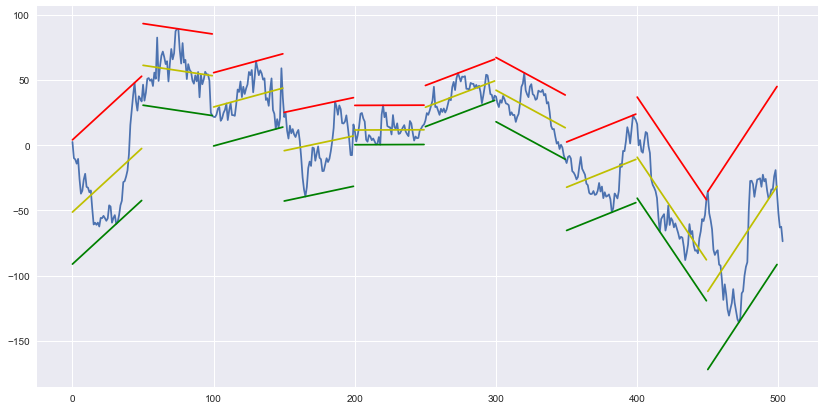

In [12]:
from abupy import tl
# 以整个市场作为观察者，usTSLA与usNOAH的相关性
rank_score, sum_rank = tl.similar.calc_similar('usNOAH', 'usTSLA')

In [14]:
# 以usTSLA作为观察者，它与usNOAH的相关性数值
for ncr in net_cg_ret:
    if ncr[0] == 'usNOAH':
        print(ncr[1])
        break
rank_score

0.0163360709756


0.41319992978760756

### 以整个市场作为观察者，与usTSLA相关性TOP 10可视化

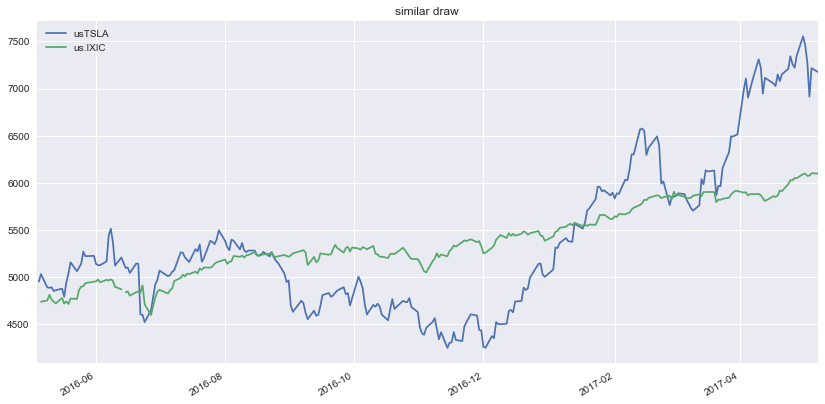

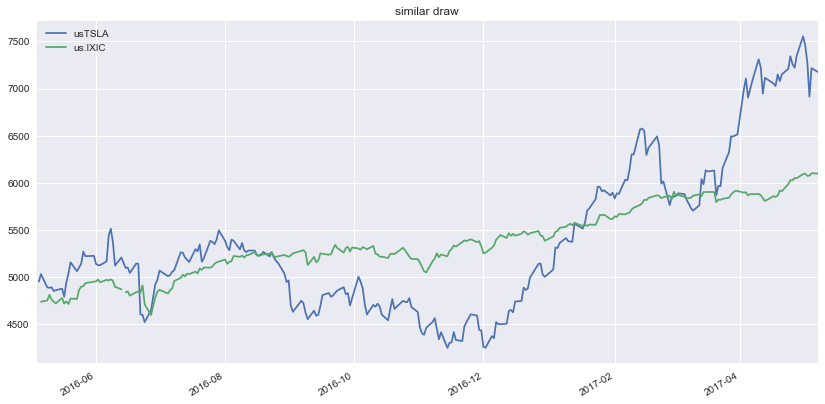

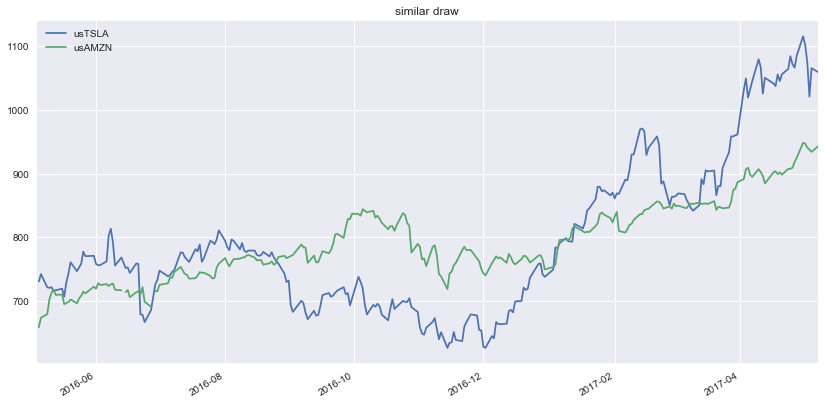

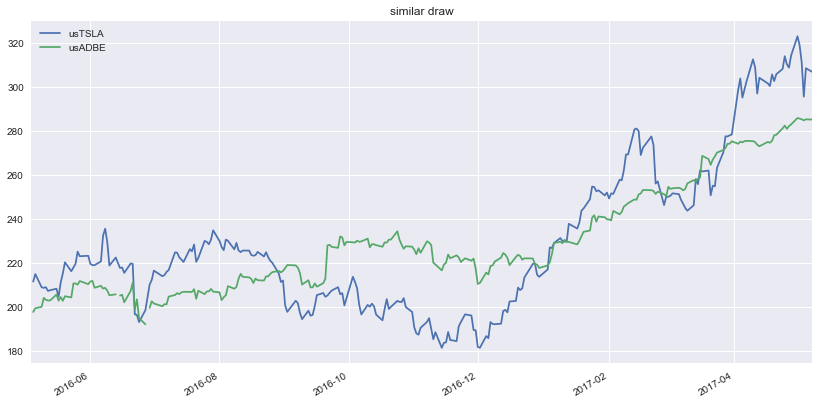

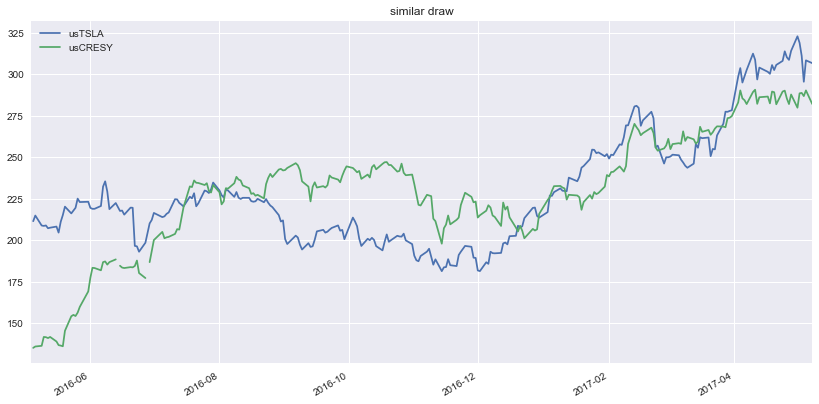

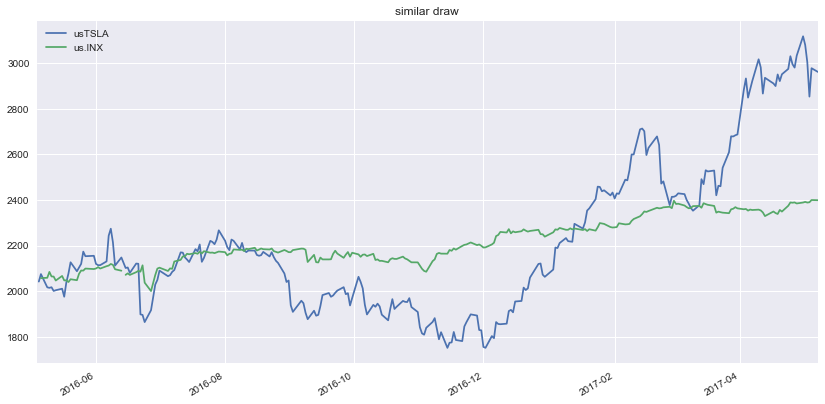

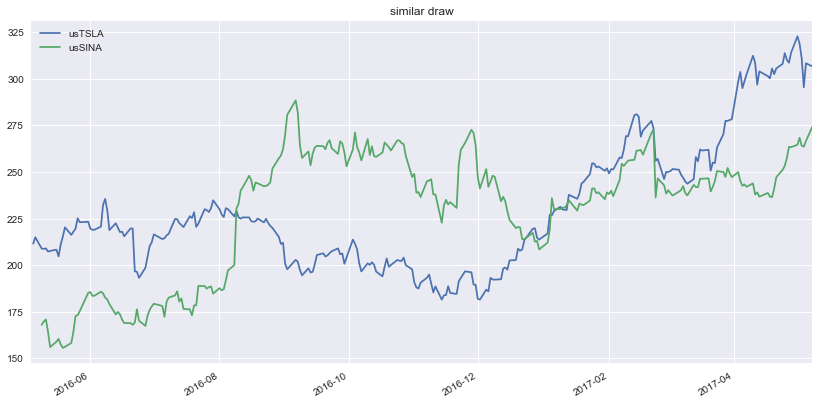

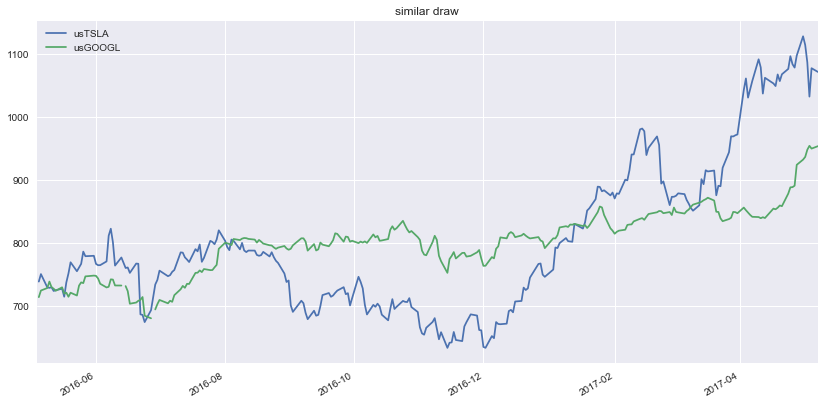

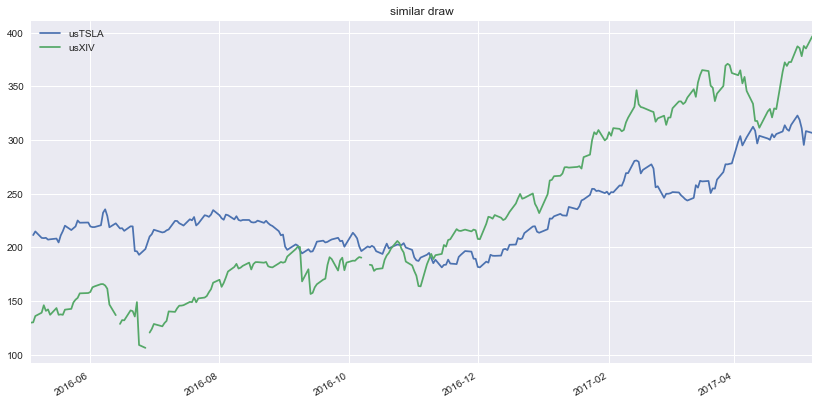

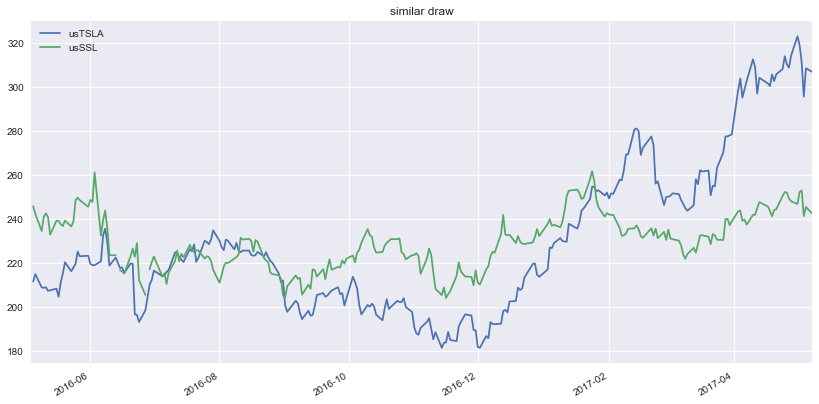

us.IXIC     5.0
us.IXIC     5.0
usAMZN      9.0
usADBE     17.0
usCRESY    21.0
us.INX     23.0
usSINA     24.0
usGOOGL    34.0
usXIV      34.0
usSSL      34.0
dtype: float64

In [7]:
from abupy import tl
tl.similar.calc_similar_top('usTSLA')

### 【示例3】相关与协整组成的一个简单量化选股策略, 使用封装好的函数coint_similar()

pid:25607 _make_kl_df complete:99.67%
pid:25607 done!


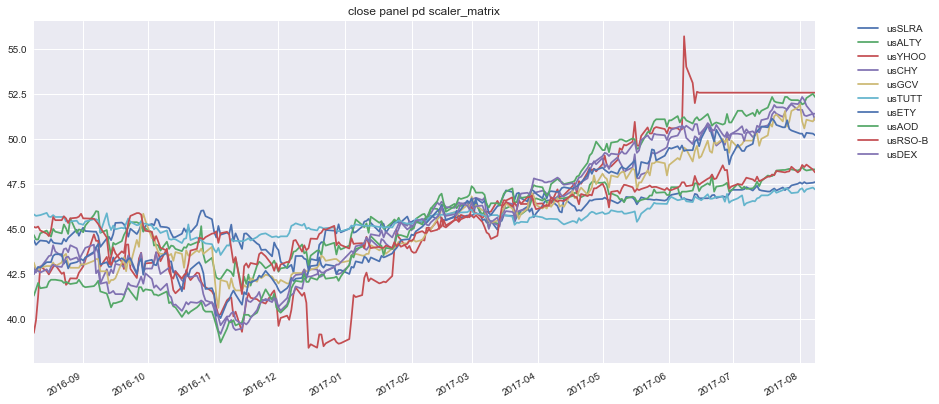

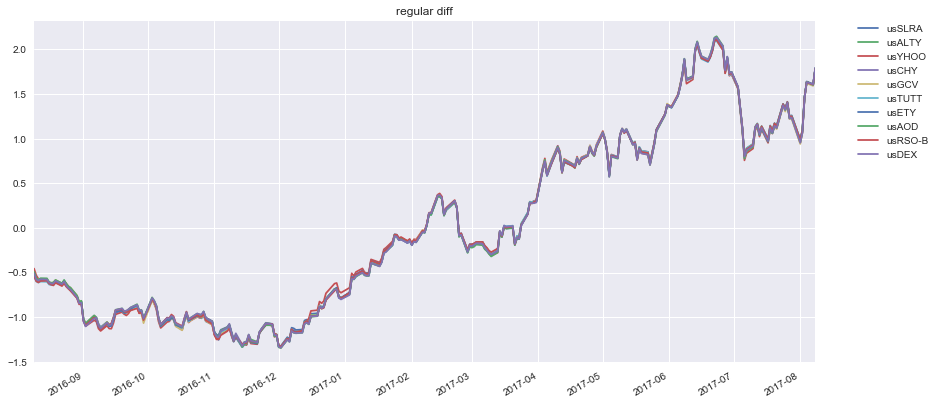

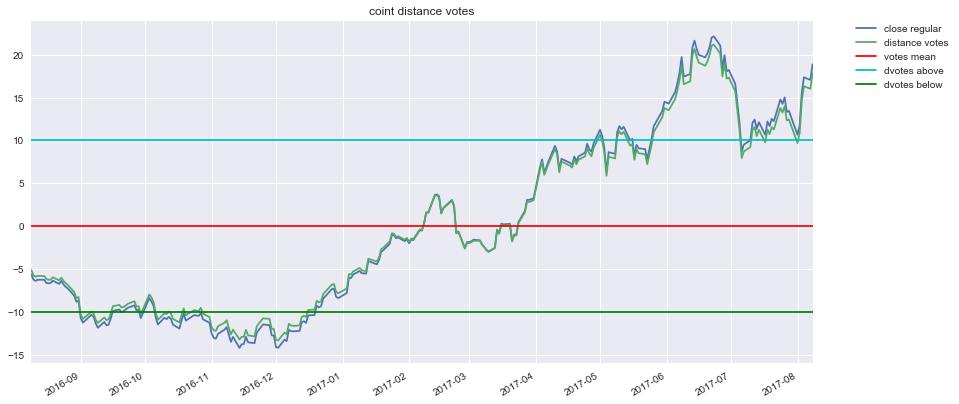

[((0.0079243161664579783, 213), 'usSLRA'),
 ((0.0094776370257684695, 171), 'usALTY'),
 ((0.02148681375503423, 55), 'usYHOO'),
 ((0.023407429281043314, 285), 'usCHY'),
 ((0.026349380722815653, 254), 'usGCV'),
 ((0.028669743050559731, 127), 'usTUTT'),
 ((0.031654815485180468, 47), 'usETY'),
 ((0.037999658388137604, 265), 'usAOD'),
 ((0.039028195828768306, 119), 'usRSO-B'),
 ((0.041980824924049955, 242), 'usDEX'),
 ((0.043466872228679655, 122), 'usCHI'),
 ((0.04351388661285769, 117), 'usCCD'),
 ((0.044824840548103456, 207), 'usFOF'),
 ((0.046320138564836029, 160), 'usLGI'),
 ((0.04633479222034978, 17), 'usHDP'),
 ((0.052055157426610564, 228), 'usPFL'),
 ((0.052283664283733808, 169), 'usSAP'),
 ((0.052542838633780627, 263), 'usVXUS'),
 ((0.065244482985267166, 88), 'usCRM'),
 ((0.06619913375946776, 188), 'usPKO'),
 ((0.066560268178293511, 114), 'usEOI'),
 ((0.070348995815817675, 110), 'usACWI'),
 ((0.070592824850213079, 269), 'usPDI'),
 ((0.073302458523803599, 35), 'usLCM'),
 ((0.0738352549

In [14]:
from abupy import tl
tl.similar.coint_similar('usTSLA')

### 【示例4】abu量化系统选股结合相关性，编写相关性选股策略

AbuPickSimilarNTop源代码请自行阅读，只简单示例使用。

In [3]:
from abupy import AbuPickSimilarNTop
from abupy import AbuPickStockWorker
from abupy import AbuBenchmark, AbuCapital, AbuKLManager
from abupy import EMarketDataFetchMode
# 强制使用本地缓存数据
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

In [4]:
benchmark = AbuBenchmark()

# 选股因子AbuPickSimilarNTop， 寻找与usTSLA相关性不低于0.95的股票
# 这里内部使用以整个市场作为观察者方式计算，即取值范围0-1
stock_pickers = [{'class': AbuPickSimilarNTop,
                'similar_stock':'usTSLA', 'threshold_similar_min':0.95}]

# 从这几个股票里进行选股，只是为了演示方便，一般的选股都会是数量比较多的情况比如全市场股票
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG', 'usTSLA', 'usWUBA', 'usVIPS']

capital = AbuCapital(1000000, benchmark)
kl_pd_manager = AbuKLManager(benchmark, capital)
stock_pick = AbuPickStockWorker(capital, benchmark, kl_pd_manager, choice_symbols=choice_symbols, stock_pickers=stock_pickers)
stock_pick.fit()
stock_pick.choice_symbols

pid:46547 pick stocks complete:100.0%
pid:46547 done!


['usBIDU', 'usAAPL', 'usGOOG', 'usTSLA']

通过选股因子first_choice属性执行批量优先选股操作，具体阅读源代码

In [17]:
benchmark = AbuBenchmark()
capital = AbuCapital(1000000, benchmark)
kl_pd_manager = AbuKLManager(benchmark, capital)

# 选股因子AbuPickSimilarNTop， 寻找与usTSLA相关性不低于0.95的股票
# 通过设置'first_choice':True，进行优先批量操作，默认从对应市场选股
stock_pickers = [{'class': AbuPickSimilarNTop, 'first_choice':True,
                'similar_stock':'usTSLA', 'threshold_similar_min':0.95}]
choice_symbols = None

capital = AbuCapital(1000000, benchmark)
kl_pd_manager = AbuKLManager(benchmark, capital)
stock_pick = AbuPickStockWorker(capital, benchmark, kl_pd_manager, choice_symbols=choice_symbols, stock_pickers=stock_pickers)
stock_pick.fit()
stock_pick.choice_symbols

pid:25607 done!


['usDGRW',
 'usAKAM',
 'usAVT',
 'usPSCT',
 'usADRE',
 'usAPH',
 'usAIRR',
 'usNDSN',
 'usDEX',
 'usVONG',
 'usCMI',
 'usROP',
 'usSNX',
 'usAN',
 'usPRFZ',
 'usTY',
 'usSKYY',
 'usGT',
 'usEEMA',
 'usQQXT',
 'usDLPH',
 'usXIV',
 'usVXUS',
 'usPSCI',
 'usGAB',
 'usFV',
 'usICLN',
 'usQQQ',
 'usENS',
 'usQQEW',
 'usGDV',
 'usDDF',
 'usXYL',
 'usVTWV',
 'usQCLN',
 'usVTHR',
 'usPSCM',
 'usETO',
 'usEXG',
 'usFUND',
 'usETB',
 'usWEX',
 'usAOD',
 'usHIVE',
 'usMTW',
 'usBID',
 'usROBO',
 'usVONV',
 'usMTD',
 'usIVZ',
 'usULTI',
 'usJBL',
 'usSCD',
 'usONEQ',
 'usGAM',
 'usEOS',
 'usCTS',
 'usNVGS',
 'usCSF',
 'usVUSE',
 'usEOI',
 'usTEN',
 'usEMF',
 'usPCLN',
 'usAGD',
 'usSCTY',
 'usGPN',
 'usBOE',
 'usPNQI',
 'usTQQQ',
 'usUSA',
 'usIEX',
 'usTDIV',
 'usFB',
 'usSOCL',
 'usFLEX',
 'usEVT',
 'usVONE',
 'usQTEC',
 'usMSF',
 'usZF',
 'usVTWG',
 'usDGRS',
 'usKWEB',
 'usIMAX',
 'usCARZ',
 'usPH',
 'usVTWO',
 'usHYI',
 'usWCC',
 'usFONE',
 'usACWI',
 'usPANW',
 'usVC',
 'usLUK',
 'usETJ',
 '